# Processing the capillary force video
+ date: 2017-05-30

## Frames Export
Get frame rate information
```sh
videoname=T-L\ _\ 1-50\ tip-tip.avi
ffmpeg -i $videoname 2>&1 |grep -o '[0-9]\+ fps'
```

The output is `30 fps`
```sh
ffmpeg -i $videoname -r 30 output_%04d.png
```

## Edges Detection
The [Canny edge detector](https://en.wikipedia.org/wiki/Canny_edge_detector) is used in this step.

In [1]:
from capillary import edge, fitting, display

In [2]:
# Read the 72nd Frame
im=edge.R(72)
# Get the edge
edg=edge.find(im)
# Extract coordinates of edges
points=edge.pts(edg)
x, y=points

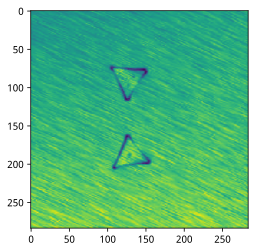

In [3]:
imshow(im);

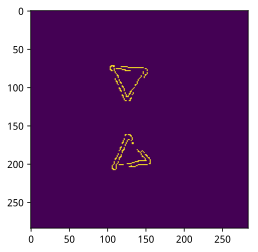

In [4]:
imshow(edg);

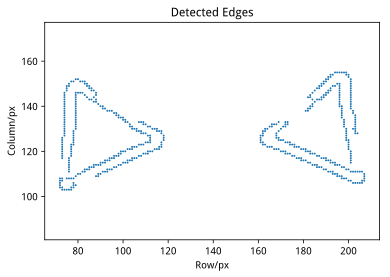

In [5]:
plot(x, y, 'o', markersize=1)
xlabel('Row/px')
ylabel('Column/px')
axis('equal');
title('Detected Edges');

## Use Major Axis to split particles
Theoretically, if a particle has symmetry for rotate $2\pi/3$, the moment of inertia $I_0$ is independent on the direction of axis as long as it passes the centroid. More general, for arbitrary axis, we can use parallel axis theorem to find $I=I_0+md^2$.

**Lemma** For two particles the major axis $\hat n$ of least moment of inertia must go through both centroid. 

So the major axis is used to estimate the line connecting both centroid. The information of another major axis $\hat m$ with greatest moment of inertia can also be used to estimate the separation $r$ of the centroid.

As $I_n\approx 2I_0, I_m\approx 2\left[I_0+m\left(\dfrac{r}{2}\right)^2\right]$, we have
$$\frac{r}{2}\approx\sqrt{\frac{I_M-I_m}{2m}}$$

If the two particles are separated far enough, we can split them into two particles based on the major axis $\hat n$ and centroids $O$ of two particles by criteria $$\mathrm{sgn}\left[(\vec r_i-\vec r_O)\cdot \hat n\right]$$

When two particles are too close, it may fail. 

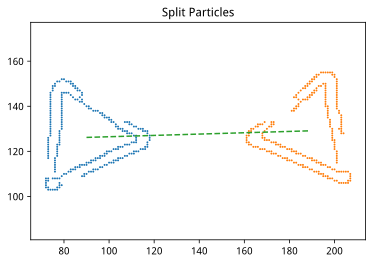

In [6]:
display.show_split(points)
display.show_axis(points)
axis('equal');
title('Split Particles');

## Use Triangles to Fit Particles 
Triangles are used to Fit Particles. Fitting parameters are centroid position $C(x, y)$ and angle location $(\rho, \theta)$ with respect to centroid $C$. The idea is like https://link.springer.com/article/10.1007%2FBF00939613 : 

$$\mathrm{minimize}\left[\sum_i|\vec r_i-\vec r_C|^2\mathrm{distance}^2(\vec r_i, \mathrm{triangle})\right]$$

The initial estimation of centroid and angle should be given to ensure a good global minimum.

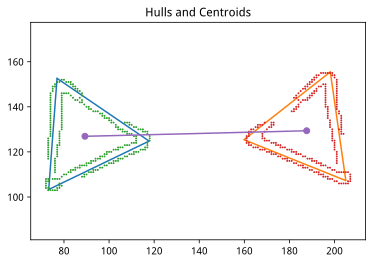

In [8]:
display.show_frame(points)
axis('equal');
title('Hulls and Centroids');